<a href="https://colab.research.google.com/github/mertozgc/pyhon-assingments/blob/main/Dv_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
kill = pd.read_csv('/content/drive/MyDrive/asingment files/PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [5]:
kill[kill["gender"] == "M"].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


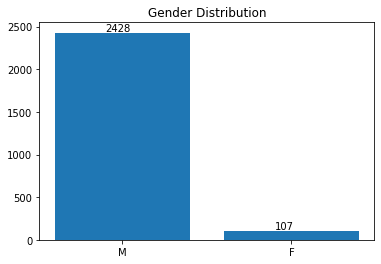

In [6]:
def barlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.1,y[i]+20,y[i])
gender = kill.gender.value_counts()
plt.bar(gender.index, gender.values)
plt.title('Gender Distribution')
barlabels(gender.index, gender.values);

## 2: Plot 7 most common kill weapons

In [7]:
kill.armed.value_counts()[0:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

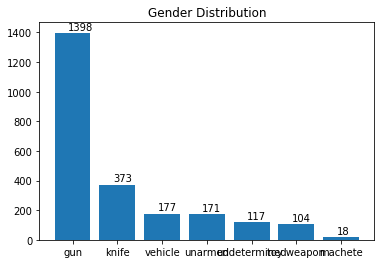

In [8]:
def barlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.1,y[i]+20,y[i])
armed = kill.armed.value_counts()[0:7]
plt.bar(armed.index, armed.values)
plt.title('Gender Distribution')
barlabels(armed.index, armed.values);

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [9]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
kill['age_cat'] = 'above25'
kill.loc[kill['age'] <=25, 'age_cat'] = 'below25'

In [11]:
kill.age_cat.value_counts()

above25    1982
below25     553
Name: age_cat, dtype: int64

In [12]:
kill[kill["age_cat"] == "above25"].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,above25


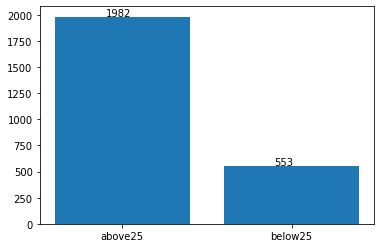

In [13]:
def barlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.1,y[i]+10,y[i])
age_cat = kill.age_cat.value_counts()
plt.bar(age_cat.index, age_cat.values)
barlabels(age_cat.index, age_cat.values)

## 4: Plot number of killed poeple by race

In [14]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

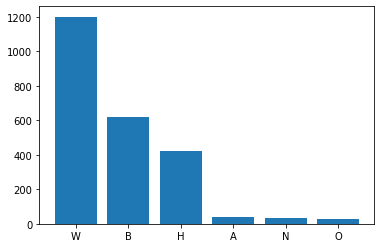

In [15]:
race = kill.race.value_counts()
plt.bar(race.index, race.values);

## 5: Killed People According to Races (Pie Chart)

In [16]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [17]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [18]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [19]:
kill.dropna(axis=0, how="any", thresh=None, inplace=True)

In [20]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [21]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [22]:
lab = kill.race.value_counts().index
lab

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [23]:
size = np.array(kill.race.value_counts())
size

array([1168,  592,  401,   36,   29,   28])

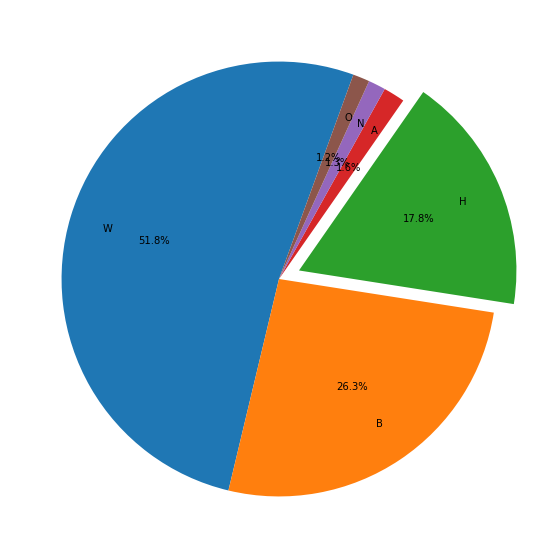

In [24]:
explode = (0, 0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(x = size, 
        explode=explode, 
        labels=lab, 
        labeldistance=0.8,
        autopct='%.1f%%',
        startangle=70,)
plt.show()